In [1]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/SchwiftyNotebook_Annealing")' SchwiftyNotebook_Annealing

Installing packages:
	.package(path: "/home/ubuntu/workspace/fast-ai-swift/SchwiftyNotebook_Annealing")
		SchwiftyNotebook_Annealing
With SwiftPM flags: []
Working in: /tmp/tmpletuqw1o/swift-install
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information availabl

In [27]:
//export
import Path
import TensorFlow
import SchwiftyNotebook_Annealing

### Things Needed
----
- Layer Activations Statistics (mean/standard deviation)
- Optimization
- Learning Rate over Time

In [3]:
Array(1...10).enumerated().reversed().forEach {
    print($0, $1)
}

9 10
8 9
7 8
6 7
5 6
4 5
3 4
2 3
1 2
0 1


In [36]:
var yeetBoi = [1,2,3,4,5]
yeetBoi.insert(0, at:0)
yeetBoi

▿ 6 elements
  - 0 : 0
  - 1 : 1
  - 2 : 2
  - 3 : 3
  - 4 : 4
  - 5 : 5


In [4]:
protocol Fam {
    func fam()
}

extension Fam {
    func fam() {
        print("Fam")
    }
}

protocol Ravioli {
    func ravioli()
}

extension Ravioli {
    func ravioli() {
        print("Ravioli")
    }
}

struct FamRavioli: Fam, Ravioli {}

let famRav = FamRavioli()

famRav.fam()
famRav.ravioli()

Fam
Ravioli


In [14]:
var thingDictionary: [Int: [Float]] =  [:]

In [15]:
for a in 1...10 {
    if thingDictionary[a] == nil {
        thingDictionary[a] = [Float(69)]
    } 
    
    thingDictionary[a]?.append(Float(a))
}
thingDictionary

▿ 10 elements
  ▿ 0 : 2 elements
    - key : 1
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 1.0
  ▿ 1 : 2 elements
    - key : 6
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 6.0
  ▿ 2 : 2 elements
    - key : 10
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 10.0
  ▿ 3 : 2 elements
    - key : 7
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 7.0
  ▿ 4 : 2 elements
    - key : 2
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 2.0
  ▿ 5 : 2 elements
    - key : 8
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 8.0
  ▿ 6 : 2 elements
    - key : 9
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 9.0
  ▿ 7 : 2 elements
    - key : 4
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 4.0
  ▿ 8 : 2 elements
    - key : 5
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 5.0
  ▿ 9 : 2 elements
    - key : 3
    ▿ value : 2 elements
      - 0 : 69.0
      - 1 : 3.0


## Model


In [82]:
//export
public struct HyperParameters {
    public let learningRate: Float
}

In [83]:
//export
public protocol ParameterActivationSubscriber {
    func observe(parameterNumber: Int, activations: TensorFloat)
}

In [120]:
//export
public protocol TeachableModel {
    
    func apply(inputTensor: TensorFloat) -> TensorFloat
    
    func forwardPass(inputTensor: TensorFloat) -> (TensorFloat, TeachableModel)
    
    func backwardsPass(ddx: TensorFloat, hyperParameters: HyperParameters) -> TeachableModel    
    
    func addActivationSubscriber(subscriber: @escaping (Int, TensorFloat) -> ()) -> TeachableModel
}

In [122]:
//export
public protocol ModelParameterV2 {
    
    func forwardPass(inputTensor: TensorFloat) -> (TensorFloat, ModelParameterV2)
    
    func apply(_ inputTensor: TensorFloat) -> TensorFloat 
    
    func backwardPass(ddx: TensorFloat, hyperParameters: HyperParameters) -> (TensorFloat, ModelParameterV2)
}

In [121]:
//export
public protocol ModelParameters {
    
    func forwardPass(inputTensor: TensorFloat) -> (TensorFloat, ModelParameters)
    
    func apply(_ inputTensor: TensorFloat) -> TensorFloat 
    
    func backwardPass(ddx: TensorFloat, hyperParameters: HyperParameters) -> (TensorFloat, ModelParameters)
    
    func subscribeToActivations(subscriber:@escaping (Int, TensorFloat) -> ()) -> ModelParameters
}

In [159]:
//export
public struct SequentialParameter: ModelParameters {
    
    private let parameters: [ModelParameterV2]
    private let subscribers: [(Int, TensorFloat) -> ()]
    
    public init(parameters: [ModelParameterV2]) {
        self.parameters = parameters
        subscribers = []
    }
    
    private init(parameters: [ModelParameterV2],
                 subscribers: [(Int, TensorFloat) -> ()]) {
        self.parameters = parameters
        self.subscribers = subscribers
    }
    
    
    public func apply(_ inputTensor: TensorFloat) -> TensorFloat {
        return parameters.reduce(inputTensor) {
            (layerInput, nextParameter) in nextParameter.apply(layerInput)
        }
    }
    
    public func forwardPass(inputTensor: TensorFloat) -> (TensorFloat, ModelParameters) {
        return runThroughLayers({self.parameters}, inputTensor, {
            $0.append($1)
            return $0
        }) { (previousActivations: TensorFloat, 
              parameter: ModelParameterV2, 
              index: Int) -> (TensorFloat, ModelParameterV2) in
            let activations = parameter.forwardPass(inputTensor: previousActivations)
            self.subscribers.forEach { subscriber in
                                      subscriber(index, activations.0)
            }
            return activations
        }
    }
    
    public func backwardPass(ddx: TensorFloat, 
                             hyperParameters: HyperParameters) -> (TensorFloat, ModelParameters) {
        return runThroughLayers({self.parameters.reversed()}, ddx, {
            $0.insert($1, at: 0)
            return $0
        }) { (previousActivations: TensorFloat, 
              parameter: ModelParameterV2, 
              index: Int) -> (TensorFloat, ModelParameterV2) in
            let activations = parameter.backwardPass(ddx: previousActivations,
                                                     hyperParameters: hyperParameters)
            
            return activations
        }
    }
    
    
    private func runThroughLayers(
        _ parameterSupplier: () -> [ModelParameterV2],
        _ initialValue: TensorFloat,
        _ paramAccumulator: (inout [ModelParameterV2], ModelParameterV2) -> [ModelParameterV2],
        _ paramActivator: (TensorFloat, ModelParameterV2, Int) -> (TensorFloat, ModelParameterV2)) 
                                                                            -> (TensorFloat, ModelParameters){
        var nextParamters : [ModelParameterV2] = []
        let (output, forwardParams) = parameterSupplier().enumerated().reduce(
            (activations: initialValue, params:  nextParamters)) {
            (accum, nextParameterAndValue) in 
            let (index, nextParameter) = nextParameterAndValue
            var (activations, params) = accum
            let (nextInput, modifiedParam) = paramActivator(activations, nextParameter, index)
            return (activations: nextInput,
                    params: paramAccumulator(&params, modifiedParam))
        }

        return (output, SequentialParameter(parameters: forwardParams,
                                            subscribers: subscribers))
    }
    
    public func subscribeToActivations(subscriber: @escaping (Int, TensorFloat) -> ()) -> ModelParameters {
        let subscribers: [(Int, TensorFloat) -> ()] = [subscriber] + self.subscribers
        return SequentialParameter(parameters: parameters, 
                                   subscribers: subscribers)
        
    }
    
}

In [160]:
//export
public struct ReLUParameter: ModelParameterV2 {
    
    private let gradientChain: (TensorFloat) -> TensorFloat
    
    public init() {
        gradientChain = { $0 }
    }
    
    private init(_ gradChain: @escaping (TensorFloat) -> TensorFloat) {
        gradientChain = gradChain
    }
    
    public func apply(_ inputTensor: TensorFloat) -> TensorFloat {
        return reLU(tensor: inputTensor)
    }
    
    public func forwardPass(inputTensor: TensorFloat) -> (TensorFloat, ModelParameterV2) {
        let (value, gradientDude) = reLUAndGradient(inputTensor: inputTensor)
        return (value, ReLUParameter(gradientDude))
    }
    
    public func backwardPass(ddx: TensorFloat,
                             hyperParameters: HyperParameters) -> (TensorFloat, ModelParameterV2) {
        let reluDDX = gradientChain(ddx)
        return (reluDDX, self)
    }
}

In [125]:
//export
public struct DenseLayerV2: ModelParameterV2 {
    let weightParameter: TensorFloat
    let biasParameter: TensorFloat
    private let gradientChain: ThreeInputGradient

    private init(weightParameter: TensorFloat,
                 biasParameter: TensorFloat,
                 gradientChain: @escaping ThreeInputGradient) {        
        self.weightParameter = weightParameter
        self.biasParameter = biasParameter
        self.gradientChain = gradientChain
    }

    private init(denseLayer: DenseLayerV2,
                 gradientChain: @escaping ThreeInputGradient) {
        self.weightParameter = denseLayer.weightParameter
        self.biasParameter = denseLayer.biasParameter
        self.gradientChain = gradientChain
    }

    public init(inputSize: Int,
                outputSize: Int){
        self.weightParameter = TensorFloat(kaimingUniform: TensorShape([inputSize, outputSize]))
        self.biasParameter = TensorFloat(zeros: [outputSize])
        self.gradientChain = { (x: TensorFloat)  in (TensorFloat([1]), TensorFloat([1]), TensorFloat([1]))}
    }

    public func forwardPass(inputTensor: TensorFloat) -> (TensorFloat, ModelParameterV2) {
        let (parameterOutput, parameterGradientChain) =
          linearCombinationAndGradient(inputTensor: inputTensor,
                                       weightParameter: self.weightParameter,
                                       biasParameter: self.biasParameter)

        return (parameterOutput, DenseLayerV2(denseLayer: self,
                                       gradientChain: {ddx in parameterGradientChain(ddx)}))
    }

    public func apply(_ inputTensor: TensorFloat) -> TensorFloat {
        return linearCombination(inputs: inputTensor,
                                       weights: self.weightParameter,
                                       bias: self.biasParameter)
    }

    public func backwardPass(ddx: TensorFloat, 
                             hyperParameters: HyperParameters) -> (TensorFloat, ModelParameterV2) {
        let (ddxInput, ddxParameter, ddxBias) = self.gradientChain(ddx)
        return (ddxInput, DenseLayerV2(
            weightParameter: self.weightParameter - hyperParameters.learningRate * ddxParameter,
            biasParameter: self.biasParameter - hyperParameters.learningRate * ddxBias,
            gradientChain: self.gradientChain))
    }
}



### Simple Model

In [9]:
struct SimpleModel : TeachableModel {
    
    private let denseLayer: ModelParameterV2
    
    private init(denseLayer: ModelParameterV2){
        self.denseLayer = denseLayer
    }
    
    public init(inputSize: Int, 
                numberOfClasses: Int) {
        self.denseLayer = DenseLayerV2(inputSize: inputSize, 
                                       outputSize: numberOfClasses)
    }
    
    public func apply(inputTensor: TensorFloat) -> TensorFloat {
        return self.denseLayer.apply(inputTensor)
    }
    
    public func forwardPass(inputTensor: TensorFloat) -> (TensorFloat, TeachableModel) {
        let (activations, newDenseLayer) = self.denseLayer.forwardPass(inputTensor: inputTensor)
        return (activations, SimpleModel(denseLayer: newDenseLayer))
    }
    
    public func backwardsPass(ddx: TensorFloat, 
                              hyperParameters: HyperParameters) -> TeachableModel {
        let (ddxDenseLayer, optimizedDenseLayer) = self.denseLayer.backwardPass(ddx: ddx, 
                                                          hyperParameters: hyperParameters)
        return SimpleModel(denseLayer: optimizedDenseLayer)
    }
}

### SequentialModel

In [161]:
struct SequentialModel : TeachableModel {
    
    private let sequentialParameter: ModelParameters
    
    private init(sequentialParameter: ModelParameters){
        self.sequentialParameter = sequentialParameter
    }
    
    public init(layerSizes: [Int]) {
        let denseLayers = layerSizes.prefix(upTo: layerSizes.count - 1)
                                        .enumerated()
                                        .flatMap { 
                                            (element: (Int, Int)) -> [ModelParameterV2] in                                       
                                            if(element.0 < layerSizes.count - 2){
                                               return [DenseLayerV2(inputSize: element.1, 
                                                               outputSize: layerSizes[element.0 + 1]), 
                                                ReLUParameter()]
                                            }
                                            else {
                                                return [
                                                    DenseLayerV2(inputSize: element.1, 
                                                               outputSize: layerSizes[element.0 + 1])
                                                ]
                                            }
                                        }
        self.sequentialParameter = SequentialParameter(parameters: denseLayers)
    }
    
    public func apply(inputTensor: TensorFloat) -> TensorFloat {
        return self.sequentialParameter.apply(inputTensor)
    }
    
    public func forwardPass(inputTensor: TensorFloat) -> (TensorFloat, TeachableModel) {
        let (activations, newSequentialModel) = self.sequentialParameter
                                                        .forwardPass(inputTensor: inputTensor)
        return (activations, SequentialModel(sequentialParameter: newSequentialModel))
    }
    
    public func backwardsPass(ddx: TensorFloat, 
                              hyperParameters: HyperParameters) -> TeachableModel {
        let (_, optimizedSequentialLayer) = self.sequentialParameter.backwardPass(ddx: ddx, 
                                                          hyperParameters: hyperParameters)
        return SequentialModel(sequentialParameter: optimizedSequentialLayer)
    }
    
    public func addActivationSubscriber(subscriber: @escaping (Int, TensorFloat) -> ()) -> TeachableModel {
     return SequentialModel(sequentialParameter: sequentialParameter
                                                       .subscribeToActivations(subscriber: subscriber))   
    }
}

In [162]:
let testSequentialModel = SequentialModel(layerSizes: [8, 6, 3, 1])
testSequentialModel

▿ SequentialModel
  ▿ sequentialParameter : SequentialParameter
    ▿ parameters : 5 elements
      ▿ 0 : DenseLayerV2
        - weightParameter : [[ -0.22523358,   0.45247218,  -0.13615423,  -0.45202813,  -0.39407077,   -0.1690754],
 [ 0.019030934, -0.008459807,    0.2618958,    0.6049739,  -0.40392965,   -0.3970543],
 [  0.21766219,  -0.21168806,  0.036516815,  -0.14550567,  -0.31253195,   -0.5434051],
 [   0.4978512,  -0.25499135,  -0.29598552,   0.56938183,    0.3433072,   -0.5160081],
 [ -0.11903131,   0.31915754,   0.14242285,  -0.12503421,  -0.48537475,    0.5342729],
 [  0.12910749,   0.33994532,  -0.14502576,  -0.22756486,    0.5710415,   0.14054331],
 [ -0.44920346,   -0.4116658,   0.15008937,  -0.16649105,  -0.36232704,   0.39920047],
 [-0.009268945,   0.13130933,   0.12833077,  -0.13546437,  -0.18972592,   0.22544141]]
        - biasParameter : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
        - gradientChain : (Function)
      ▿ 1 : ReLUParameter
        - gradientChain : (Function)


## Data

In [129]:
//export
public struct DataBunch<T> where T: TensorGroup {
    public let trainingDataset: Dataset<T>
    public let validationDataset: Dataset<T>
}

In [130]:
// export
public struct SupervisedLearningGroup {
    let features: TensorFloat
    let labels: TensorFloat
}

extension SupervisedLearningGroup: TensorGroup {
    
    public static var _typeList: [TensorDataType] = [
        Float.tensorFlowDataType,
        Float.tensorFlowDataType
    ]
    public static var _unknownShapeList: [TensorShape?] = [nil, nil]
    public var _tensorHandles: [_AnyTensorHandle] {
        fatalError("unimplemented")
    }
    public func _unpackTensorHandles(into address: UnsafeMutablePointer<CTensorHandle>?) {
        address!.advanced(by: 0).initialize(to: features.handle._cTensorHandle)
        address!.advanced(by: 1).initialize(to: labels.handle._cTensorHandle)
    }
    public init(_owning tensorHandles: UnsafePointer<CTensorHandle>?) {
        features = Tensor(handle: TensorHandle(_owning: tensorHandles!.advanced(by: 0).pointee))
        labels = Tensor(handle: TensorHandle(_owning: tensorHandles!.advanced(by: 1).pointee))
    }
    public init<C: RandomAccessCollection>(_handles: C) where C.Element: _AnyTensorHandle {
        fatalError("unimplemented")
    }
}

public extension Sequence where Element == SupervisedLearningGroup {
    var first: SupervisedLearningGroup? {
        return first(where: { _ in true })
    }
}

public extension Dataset where Element == SupervisedLearningGroup {
    init(featuresTensor: TensorFloat, labelsTensor: TensorFloat) {
        self.init(elements: SupervisedLearningGroup(
                                                    features: featuresTensor, 
                                                    labels: labelsTensor.expandingShape(at: 1)))
    }
}

In [131]:
import Python


## Teach

In [132]:
//export 
public protocol TeachingDelegate {
    
    func preTeach(epochs: Int)
    
    func postTeach()
    
    func preEpoch(epochNumber: Int, dataSet: Dataset<SupervisedLearningGroup>)
    
    func postEpoch(epochNumber: Int)
    
    func processBatch(model: TeachableModel, 
                      xDataPoints: TensorFloat,
                      yValidationPoints: TensorFloat) -> TeachableModel    
}

In [133]:
//export
public struct Teacher {
    
    private let dataBunch: DataBunch<SupervisedLearningGroup>
    private let trainingDelegate: TeachingDelegate
    private let validationDelegate: TeachingDelegate
    
    
    public func teachModel(model: TeachableModel,
                           numberOfEpochs: Int) -> TeachableModel {
        notifyPreTeach(epochs: numberOfEpochs)
        let taughtModel = (1...numberOfEpochs)
            .reduce(into: model) { (currentModel: inout TeachableModel, 
                                    epoch: Int) in
                let trainedModel = trainModel(modelToTeach: currentModel,
                                              currentEpoch: epoch)
                currentModel = validateModel(modelToValidate: trainedModel,
                                             currentEpoch: epoch)
            }
        notifyPostTeach()
        return taughtModel
    }
    
    private func trainModel(modelToTeach: TeachableModel, 
                            currentEpoch: Int) -> TeachableModel {
        return processDataSet(model: modelToTeach,
                           epoch: currentEpoch,
                           dataSet: dataBunch.trainingDataset,
                           teachingDelegate: trainingDelegate)
    }
    
    private func validateModel(modelToValidate: TeachableModel, 
                               currentEpoch: Int) -> TeachableModel {
        return processDataSet(model: modelToValidate,
                              epoch: currentEpoch,
                              dataSet: dataBunch.validationDataset,
                              teachingDelegate: validationDelegate)
    }
    
    private func processDataSet(model: TeachableModel,
                             epoch: Int,
                             dataSet: Dataset<SupervisedLearningGroup>,
                             teachingDelegate: TeachingDelegate
                            ) -> TeachableModel {
        
        teachingDelegate.preEpoch(epochNumber: epoch, 
                                  dataSet: dataSet)
        
        let taughtModel: TeachableModel = dataSet.reduce(model) {
            (currentModel:TeachableModel, dataGroup: SupervisedLearningGroup) in
            return teachingDelegate.processBatch(model: currentModel, 
                                                         xDataPoints: dataGroup.features, 
                                                         yValidationPoints: dataGroup.labels)
        }
        
        teachingDelegate.postEpoch(epochNumber: epoch)
        
        return taughtModel
    }
    
    
    private func notifyPreTeach(epochs: Int) {
        trainingDelegate.preTeach(epochs: epochs)
        validationDelegate.preTeach(epochs: epochs)
    }
    
    private func notifyPostTeach() {
        trainingDelegate.postTeach()
        validationDelegate.postTeach()
    }
}

## Teaching Delegates

In [134]:
//export
public protocol LossFunction {
    func lossAndGradient(expectedTensor: TensorFloat,
                         actualTensor: TensorFloat) -> (loss: TensorFloat,
                                                        gradientSupplier: () -> TensorFloat)
    func calculateLoss(expectedTensor: TensorFloat,
                       actualTensor: TensorFloat) -> TensorFloat
}

In [135]:
//export
public struct MeanSquaredErrorLossFunction: LossFunction {
        
    public func calculateLoss(expectedTensor: TensorFloat, 
                              actualTensor: TensorFloat) -> TensorFloat {
        let error: TensorFloat = calculateError(expectedTensor: expectedTensor,
                                   actualTensor: actualTensor)
        return error.squared().mean()
    }
    
    public func lossAndGradient(expectedTensor: TensorFloat, 
                                actualTensor: TensorFloat) -> (loss: TensorFloat, 
                                                               gradientSupplier: () -> TensorFloat) {
        let error = calculateError(expectedTensor:expectedTensor, 
                                   actualTensor: actualTensor)
        let (squareValue, squareGradient) = squaredWithGradient(inputTensor: error)
        let (meanValue, meanGradient) = meanWithGradient(inputTensor: squareValue)

        return (loss: meanValue, gradientSupplier: { squareGradient(meanGradient(TensorFloat([1]))) })
    }
    
    private func calculateError(expectedTensor: TensorFloat,
                                actualTensor: TensorFloat) -> TensorFloat {
        assert(expectedTensor.shape == actualTensor.shape, "Expected \(expectedTensor.shape) to be the same as \(actualTensor.shape)")
        return actualTensor - expectedTensor // order is SUPER important here
    }
}

In [136]:
class ValidationDelegate: TeachingDelegate {
    
    let lossFunction: LossFunction
    
    public init(lossFunction: LossFunction) {
        self.lossFunction = lossFunction
    }
    
    private var epochNumber: Int = 0
    private var numberOfBatches: Int = 0
    private var totalLoss: TensorFloat = TensorFloat([0.0])
    var lossCount: [Float] = []
    
    public func postEpoch(epochNumber: Int) {
        let loss = totalLoss / Float(numberOfBatches) 
        lossCount.append(loss.scalarized())
        
    }
    
    public func preEpoch(epochNumber: Int, 
                         dataSet: Dataset<SupervisedLearningGroup>) {
        numberOfBatches = 0
        totalLoss = TensorFloat([0.0])
    }
    
    public func preTeach(epochs: Int) {
    
    }
    
    public func postTeach() {
    
    }
    
    
    public func processBatch(model: TeachableModel, 
                             xDataPoints: TensorFloat, 
                             yValidationPoints: TensorFloat) -> TeachableModel {

        let predictions = model.apply(inputTensor: xDataPoints)
        
        let loss = lossFunction.calculateLoss(expectedTensor: yValidationPoints, 
                                                                    actualTensor: predictions)
        totalLoss += loss
        numberOfBatches += 1
        
        return model
    }
    
}

In [138]:
class TrainingDelegate: TeachingDelegate {
    
    let lossFunction: LossFunction
    
    public init(lossFunction: LossFunction) {
        self.lossFunction = lossFunction
    }
    
    private var epochNumber: Int = 0
    private var numberOfBatches: Int = 0
    private var totalLoss: TensorFloat = TensorFloat([0.0])
    var lossCount: [Float] = []
    var activationBuckets: [Int: [[Float]]] = [:]
    
    
    public func postEpoch(epochNumber: Int) {
        let loss = totalLoss / Float(numberOfBatches)
        lossCount.append(loss.scalarized())
    }
    
    public func preEpoch(epochNumber: Int, 
                         dataSet: Dataset<SupervisedLearningGroup>) {
        numberOfBatches = 0
        totalLoss = TensorFloat([0.0])
    }
    
    public func preTeach(epochs: Int) {
    
    }
    
    public func postTeach() {
        
    }
    
    
    public func processBatch(model: TeachableModel, 
                             xDataPoints: TensorFloat, 
                             yValidationPoints: TensorFloat) -> TeachableModel {
        let subcribedModel = model.addActivationSubscriber(subscriber:  {
            (parameterNumber: Int, activations: TensorFloat) in
                if self.activationBuckets[parameterNumber] == nil {
                    self.activationBuckets[parameterNumber] = [[],[]]
                } 
                self.activationBuckets[parameterNumber]?[0].append(activations.mean().scalarized())
                self.activationBuckets[parameterNumber]?[1].append(activations.standardDeviation().scalarized())
                
        })
        
        let (predictions, modelWithChain) = subcribedModel.forwardPass(inputTensor: xDataPoints)
        
        let (lossyBoi, predictionGradientSupplier) = lossFunction.lossAndGradient(expectedTensor: yValidationPoints, 
                                                                    actualTensor: predictions)
        
        totalLoss += lossyBoi
        numberOfBatches += 1
        
        // todo: Optimize Hyper Parameters beforehand
        let hyperParameters = HyperParameters(learningRate: 1e-2)
        
        return modelWithChain.backwardsPass(ddx: predictionGradientSupplier(),
                                            hyperParameters: hyperParameters)
    }
    
}

# Point Data Trials
---

In [139]:
let n = 100
let inputPoints = TensorFloat(randomNormal: [100, 1])
let A = inputPoints.concatenated(with: TensorFloat(ones: inputPoints.shape), alongAxis: 1)
A.shape

▿ [100, 2]
  ▿ dimensions : 2 elements
    - 0 : 100
    - 1 : 2


In [140]:
let yValidationPoints = matmul(A, TensorFloat([-2, 7]).expandingShape(at: 1)) + 
                (TensorFloat(randomNormal: inputPoints.shape, seed: (69, 420)) * 2.5)
yValidationPoints.shape

▿ [100, 1]
  ▿ dimensions : 2 elements
    - 0 : 100
    - 1 : 1


In [141]:
import Python
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [142]:
public let plotter = Python.import("matplotlib.pyplot")

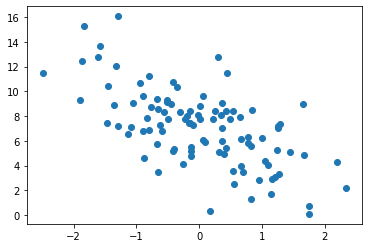

None


In [143]:
plotter.scatter(x: A.slice(lowerBounds: [0, 0], upperBounds:[A.shape[0], 1] ).makeNumpyArray(), 
                y: yValidationPoints.makeNumpyArray())
plotter.show()

In [144]:
func showYHat(yHat: TensorFloat) {
    plotter.scatter(x: A.slice(lowerBounds: [0, 0], upperBounds:[A.shape[0], 1] ).makeNumpyArray(), 
                y: yValidationPoints.makeNumpyArray())
    plotter.scatter(x: A.slice(lowerBounds: [0, 0], upperBounds:[A.shape[0], 1] ).makeNumpyArray(), 
                y: yHat.makeNumpyArray())
    plotter.show()
}

In [163]:
let linearModel = SequentialModel(layerSizes: [2, 1])
linearModel

▿ SequentialModel
  ▿ sequentialParameter : SequentialParameter
    ▿ parameters : 1 element
      ▿ 0 : DenseLayerV2
        - weightParameter : [[ -0.2438298],
 [-0.42547706]]
        - biasParameter : [0.0]
        - gradientChain : (Function)
    - subscribers : 0 elements


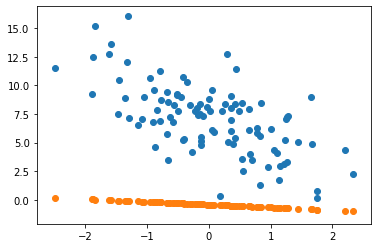

In [164]:
showYHat(yHat: linearModel.apply(inputTensor: A))

In [165]:
//export
public extension Dataset where Element == SupervisedLearningGroup {
    init(featureTensor: TensorFloat, labelTensor: TensorFloat) {
        self.init(elements: SupervisedLearningGroup(features: featureTensor, 
                                     labels: labelTensor))
    }
}

In [166]:
let linearDataSet = Dataset(featureTensor: A, labelTensor: yValidationPoints).batched(100)
let linearDataBunch = DataBunch(trainingDataset: linearDataSet,
                               validationDataset: linearDataSet)

In [167]:
let meanSquaredLossFunction = MeanSquaredErrorLossFunction()
let simpleTrainingDelegate = TrainingDelegate(lossFunction: meanSquaredLossFunction)
let simpleValidationDelegate = ValidationDelegate(lossFunction: meanSquaredLossFunction)

In [168]:
let linearTeacher = Teacher(dataBunch: linearDataBunch, 
                            trainingDelegate: simpleTrainingDelegate, 
                            validationDelegate: simpleValidationDelegate)

In [169]:
let taughtLinearModel = linearTeacher.teachModel(model: linearModel, 
                                                 numberOfEpochs: 100)

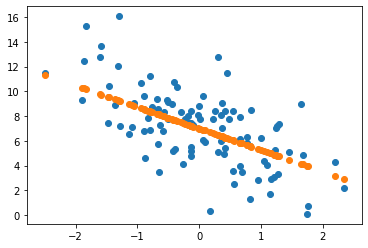

In [170]:
showYHat(yHat: taughtLinearModel.apply(inputTensor: A))

In [171]:
func plotLoss(lossArray: [Float]){
    plotter.figure(figsize: [12, 8])

    let lossAxes = plotter.subplot(2, 1, 2)
    lossAxes.set_ylabel("Loss")
    lossAxes.set_xlabel("Epoch")
    lossAxes.plot(lossArray)

    plotter.show()
}

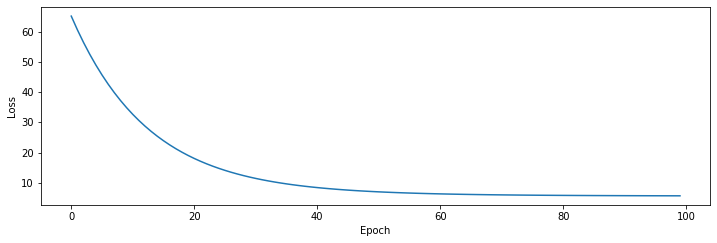

In [172]:
plotLoss(lossArray: simpleTrainingDelegate.lossCount)

In [173]:
simpleTrainingDelegate.activationBuckets

▿ 1 element
  ▿ 0 : 2 elements
    - key : 0
    ▿ value : 2 elements
      ▿ 0 : 5050 elements
        - 0 : -0.42691576
        - 1 : -0.12574032
        - 2 : -0.12574032
        - 3 : 0.16339158
        - 4 : 0.16339158
        - 5 : 0.16339158
        - 6 : 0.44096157
        - 7 : 0.44096157
        - 8 : 0.44096157
        - 9 : 0.44096157
        - 10 : 0.7074321
        - 11 : 0.7074321
        - 12 : 0.7074321
        - 13 : 0.7074321
        - 14 : 0.7074321
        - 15 : 0.963247
        - 16 : 0.963247
        - 17 : 0.963247
        - 18 : 0.963247
        - 19 : 0.963247
        - 20 : 0.963247
        - 21 : 1.2088325
        - 22 : 1.2088325
        - 23 : 1.2088325
        - 24 : 1.2088325
        - 25 : 1.2088325
        - 26 : 1.2088325
        - 27 : 1.2088325
        - 28 : 1.444598
        - 29 : 1.444598
        - 30 : 1.444598
        - 31 : 1.444598
        - 32 : 1.444598
        - 33 : 1.444598
        - 34 : 1.444598
        - 35 : 1.444598
        - 36 : 

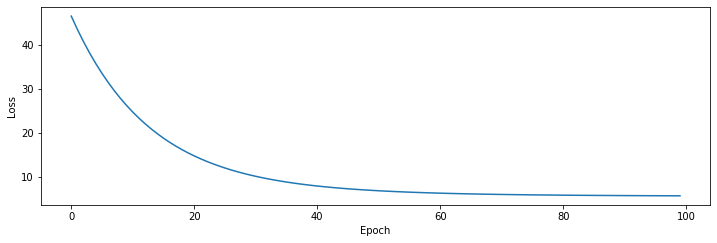

In [155]:
plotLoss(lossArray: simpleValidationDelegate.lossCount)

----

# Car Data!
----

In [38]:
//export
let carDataYCSV = "/home/ubuntu/.machine-learning/data/car_stuff/pakistan_car_labels.csv"
let carDataXCSV = "/home/ubuntu/.machine-learning/data/car_stuff/pakistan_car_x_data.csv"

public let numpy = Python.import("numpy")

func createDataSet(featureTensor: TensorFloat, 
                   labelTensor: TensorFloat, 
                   batchSize: Int) -> Dataset<SupervisedLearningGroup> {
    return Dataset(featuresTensor: featureTensor, labelsTensor: labelTensor)
                    .batched(batchSize)
                    .shuffled(sampleCount: 64, 
                              randomSeed: 69, 
                              reshuffleForEachIterator: true)
}

public func getUsedCarDataBunch(validationSize: Double = 0.2,
                             batchSize: Int = 1028
                            ) -> DataBunch<SupervisedLearningGroup> {
    let usedCarFeaturesArray = numpy.loadtxt(carDataXCSV, 
                                delimiter: ",", 
                                skiprows: 1, 
                                usecols: Array(1...8), 
                                dtype: Float.numpyScalarTypes.first!)
    let categoricalVariableSet: Set = [0,1,2,3,4,5,6,7]
    let continousVariableSet: Set = [-1]
    let usedCarFeatureTensor = reScaleFeatures(featureTensor: TensorFloat(numpy: usedCarFeaturesArray)!, 
                                               catVars: categoricalVariableSet, 
                                               contVars: continousVariableSet)
    
    let usedCarPrices = numpy.loadtxt(carDataYCSV, 
                                delimiter: ",", 
                                skiprows: 0, 
                                usecols: [1], 
                                dtype: Float.numpyScalarTypes.first!)
    let usedCarLabelsTensor = TensorFloat(numpy: usedCarPrices)!
    
    let numberOfUsedCars = usedCarFeatureTensor.shape[0]
    let numberOfUsedCarFeatures = usedCarFeatureTensor.shape[1]
    
    let validationDatasetSize = Int32(floor(validationSize * Double(numberOfUsedCars)))
    let trainingDataSetSize = Int32(numberOfUsedCars) - validationDatasetSize
    
    
    let splitFeatures = usedCarFeatureTensor
                                .split(sizes: Tensor<Int32>([validationDatasetSize, trainingDataSetSize]), 
                                       alongAxis: 0)
    let splitLabels = usedCarLabelsTensor
                            .split(sizes: Tensor<Int32>([validationDatasetSize, trainingDataSetSize]), 
                                   alongAxis: 0)
    
    let validationDataSet = createDataSet(featureTensor: splitFeatures[0],
                                        labelTensor: splitLabels[0], batchSize: batchSize)
    let trainingDataSet = createDataSet(featureTensor: splitFeatures[1],
                                        labelTensor: splitLabels[1], batchSize: batchSize)
    return DataBunch(trainingDataset: trainingDataSet, 
                     validationDataset: validationDataSet)
}

In [39]:
let usedCarDataBunch = getUsedCarDataBunch()

# Car Data Test

In [40]:
let meanSquaredErrorLossy = MeanSquaredErrorLossFunction()
let protoTrainingDelegate = TrainingDelegate(lossFunction: meanSquaredErrorLossy)
let protoValidationDelegate = ValidationDelegate(lossFunction: meanSquaredErrorLossy)

In [41]:
let protoModelTeacher = Teacher(dataBunch: usedCarDataBunch, 
                                trainingDelegate: protoTrainingDelegate, 
                                validationDelegate: protoValidationDelegate)

In [42]:
let firstValidationBatch = usedCarDataBunch.validationDataset.first!
let firstTrainingBatch = usedCarDataBunch.trainingDataset.first!

let simpleUntrainedModel = SequentialModel(layerSizes: [
    firstValidationBatch.features.shape[1],
    firstValidationBatch.features.shape[1] * 2,
    1
])
simpleUntrainedModel

▿ SequentialModel
  ▿ sequentialParameter : SequentialParameter
    ▿ parameters : 3 elements
      ▿ 0 : DenseLayerV2
        - weightParameter : [[ -0.50704277,  -0.36103135,   0.48170546,   0.13169959, -0.021487255,   0.10521239,
     0.5413813, -0.053884797,    0.3708813,     -0.39017,   0.27099752,  -0.48175058,
   -0.22568604,    0.5608581,   0.15327255,    0.5690431],
 [ -0.27839875,   0.17884484,  -0.60898715,  -0.24519585,   0.33367047,  -0.52492386,
     0.5863006,  0.041461866,   0.31773797,  -0.50098836,  -0.31947634,   0.29557517,
    -0.5868455,    0.5700865,  -0.26786608,   0.24907298],
 [  -0.2590142,  -0.24418174,  -0.16562554,  -0.30562603,  -0.31967854,   0.48839828,
   -0.49216437,    0.5920046,  0.019490035,   0.16938873,   0.48058912,  -0.38660312,
     0.5967616, -0.066197425,    0.2233755,  -0.40282258],
 [ -0.37174627,   0.05490892,   -0.5534029,   0.10551804,    0.2508523,  -0.38341126,
     0.5233241,   -0.2620394,  -0.12602949,     0.498498,  -0.05660421,  -

In [43]:
let predictions = simpleUntrainedModel.apply(inputTensor: firstValidationBatch.features)
meanSquaredErrorLossy.calculateLoss(expectedTensor: firstValidationBatch.labels, 
                                    actualTensor: predictions)

1.6359735e+12


In [44]:
let testPreds = testSequentialModel.apply(inputTensor: firstValidationBatch.features)
meanSquaredErrorLossy.calculateLoss(expectedTensor: firstValidationBatch.labels, 
                                    actualTensor: testPreds)

1.6359748e+12


In [45]:
let simpleTrainedModel = withTime { 
    protoModelTeacher.teachModel(model: simpleUntrainedModel, 
                                                      numberOfEpochs: 100)
                                  }

elapsed time: 12.326616245 s


In [46]:
let predictions = simpleTrainedModel.apply(inputTensor: firstValidationBatch.features)
meanSquaredErrorLossy.calculateLoss(expectedTensor: firstValidationBatch.labels, 
                                    actualTensor: predictions)

8.4722654e+11


In [47]:
let predictions = simpleTrainedModel.apply(inputTensor: firstTrainingBatch.features)
meanSquaredErrorLossy.calculateLoss(expectedTensor: firstTrainingBatch.labels, 
                                    actualTensor: predictions)

7.813652e+12


In [48]:
usedCarDataBunch.trainingDataset.reduce(simpleTrainedModel){
    let predictions = $0.apply(inputTensor: $1.features)
    let lossBoi = meanSquaredErrorLossy.calculateLoss(expectedTensor: $1.labels, 
                                    actualTensor: predictions)
    print(lossBoi)
    return $0
}

7.813652e+12
9.718131e+11
7.440386e+11
1.6784907e+13
1.09278206e+12
8.10965e+11
7.580418e+11
8.3467954e+11
7.2892364e+11
3.3467093e+12
1.2441564e+12
1.0028363e+12
1.8302243e+12
1.1889159e+13
1.2560199e+12
9.5393356e+11
5.3671907e+11
7.0035676e+11
4.7862078e+11
5.8798696e+11


▿ SequentialModel
  ▿ sequentialParameter : SequentialParameter
    ▿ parameters : 3 elements
      ▿ 0 : DenseLayerV2
        - weightParameter : [[ -5.760463e+08, -1.5525457e+10, -1.2290721e+09, -2.3180777e+10,  -6.658454e+08,
      -200.46294, -1.0972236e+10, -1.2364908e+10,  -9.165431e+09,     -211.72893,
      -272.89294,    -0.48175058, -2.8248066e+10, -8.3886587e+09,     -2588.0073,
   -5.688346e+08],
 [ -6.140934e+08, -1.9536685e+10, -1.5466191e+09,  -2.916985e+10,  -8.378768e+08,
     -0.52492386, -1.3807063e+10, -1.5559548e+10,  -1.153345e+10,     -254.92776,
       -567.6293,     0.29557517,  -3.554634e+10,  -1.055599e+10,    -0.26786608,
    -7.15801e+08],
 [-1.6740924e+09,  -4.470572e+10, -3.5391232e+09, -6.6749264e+10, -1.9173093e+09,
      -693.90106, -3.1594615e+10, -3.5604845e+10,  -2.639193e+10,     -256.97504,
      -638.63104,    -0.38660312,  -8.134055e+10, -2.4155204e+10,      -6250.822,
   -1.637964e+09],
 [ -7.070825e+08, -1.9635126e+10,  -1.554414e+09, -2.93168

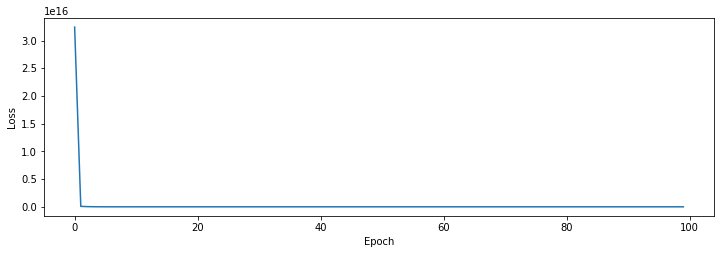

In [49]:
plotLoss(lossArray: protoTrainingDelegate.lossCount)

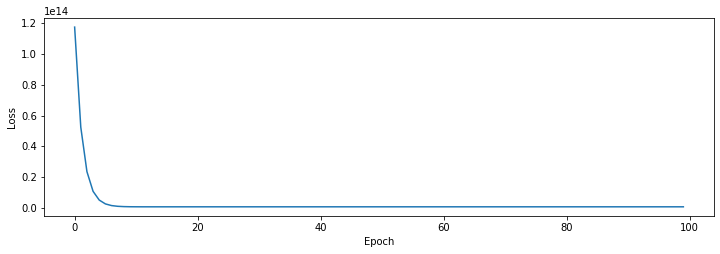

In [50]:
plotLoss(lossArray: protoValidationDelegate.lossCount)

# Tensor Flow Stuff

In [77]:
let inputSize = firstValidationBatch.features.shape[1]
let hiddenSize = inputSize - 2


struct UsedCarModel: Layer {
    var layer1 = Dense<Float>(inputSize: inputSize, outputSize: inputSize / 2, activation: relu)
    var layer2 = Dense<Float>(inputSize: inputSize / 2, outputSize: 1)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return input.sequenced(through: layer1, layer2)
    }
}

In [52]:
var model = UsedCarModel()

In [53]:
let firstTrainPredictions = model(firstValidationBatch.features)
firstTrainPredictions[0..<5]

[[-0.73881423],
 [ -2.0745351],
 [ -1.8709733],
 [-0.79829305],
 [-0.79829305]]


In [54]:
let libLoss = meanSquaredError(predicted: firstTrainPredictions, expected:firstValidationBatch.labels)
libLoss

1.6359767e+12


In [55]:
let (myLoss, myGrad) = meanSquaredErrorAndGradient(yHat: firstTrainPredictions, y: firstValidationBatch.labels)
myLoss

1.6359767e+12


In [56]:
let optimizer = SGD(for: model, learningRate: 1e-2)

In [57]:
let (libLoss2, libGrads) = model.valueWithGradient {
    model -> TensorFloat in
    let libPreds = model(firstValidationBatch.features)
    return meanSquaredError(predicted: libPreds, expected: firstValidationBatch.labels)
}
libLoss2

1.6359767e+12


In [58]:
optimizer.update(&model.allDifferentiableVariables, along: libGrads)

In [59]:
let libLossEnhanced = meanSquaredError(predicted: model(firstValidationBatch.features), 
                                       expected:firstValidationBatch.labels)
libLossEnhanced

2.8808377e+16


In [60]:
func accuracy(expected: TensorFloat, actual: TensorFloat) -> Float {
    return (actual - expected).mean().scalarized()
}

In [70]:
let epochCount = 100
var trainingLoss: [Float] = []


In [84]:

var model3 = UsedCarModel()

In [85]:
let optimizer = SGD(for: model3, learningRate: 1e-2)

In [91]:
withTime { 
    for epoch in 1...100 {
        var epochLoss: Float = 0
        var epochAccuracy: Float = 0
        var batchCount: Int = 0

        for dataGroup in usedCarDataBunch.trainingDataset {
            let (loss, libraryGradients) = model3.valueWithGradient {
                model -> TensorFloat in
                let libPreds = model(dataGroup.features)
                return  meanSquaredError(predicted: libPreds, expected: dataGroup.labels)
            }

            optimizer.update(&model3.allDifferentiableVariables, along: libraryGradients)

            let preds = model(dataGroup.features)
            let batchAccuracy = accuracy(expected: dataGroup.labels, 
                                      actual: preds)
            let batchLoss = loss.scalarized()
            epochAccuracy += batchAccuracy
            epochLoss += batchLoss

            batchCount += 1
        }
        trainingLoss.append(epochLoss / Float(batchCount))
    }
}

elapsed time: 15.078995081 s


In [92]:
14.845449664 / 12.98729881

1.1430744669221944


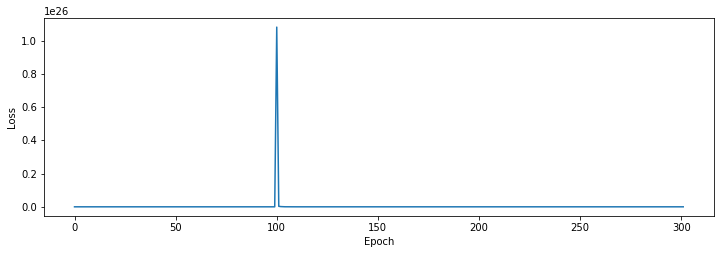

In [93]:
plotLoss(lossArray: trainingLoss)

In [94]:
let firstValidationBatch = usedCarDataBunch.validationDataset.first!
let myFinalLoss = meanSquaredError(predicted: simpleTrainedModel.apply(inputTensor: firstValidationBatch.features), 
                                   expected: firstValidationBatch.labels)
let tfFinalLoss = meanSquaredError(predicted: model3(firstValidationBatch.features), 
                                   expected: firstValidationBatch.labels)

print(myFinalLoss, tfFinalLoss, myFinalLoss <= tfFinalLoss)

8.4722654e+11 8.4722654e+11 true


In [95]:
usedCarDataBunch.trainingDataset.reduce(model3){
    let predictions = $0($1.features)
    let lossBoi = meanSquaredErrorLossy.calculateLoss(expectedTensor: $1.labels, 
                                    actualTensor: predictions)
    
    let myPredictions = simpleTrainedModel.apply(inputTensor: $1.features)
    let myLoss = meanSquaredErrorLossy.calculateLoss(expectedTensor: $1.labels, 
                                    actualTensor: myPredictions)
    print(myLoss - lossBoi)
    return $0
}

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


▿ UsedCarModel
  ▿ layer1 : Dense<Float>
    - weight : [[-1.6852279e+09, -6.5582204e+07,      -297.1054, -1.8553845e+08],
 [-2.1017638e+09,  -8.179214e+07,     -359.45148,  -2.313981e+08],
 [-4.8984305e+09, -1.9062818e+08,     -359.48767,  -5.393023e+08],
 [-2.1464652e+09,  -8.353227e+07,     -141.11497, -2.3631926e+08],
 [-7.8296896e+08, -3.0470068e+07,     -112.22159,  -8.620239e+07],
 [-1.1809777e+09,  -4.595847e+07,     -360.42587, -1.3002226e+08],
 [ -1.475153e+10,  -5.740756e+08,      -0.597077, -1.6240992e+09],
 [ -2.326669e+08,     -9054558.0,    -0.11941078, -2.5615954e+07]]
    - bias : [-1.5425768e+10,  -6.003145e+08,     -359.81262, -1.6983305e+09]
    - activation : (Function)
  ▿ layer2 : Dense<Float>
    - weight : [[-1.0137573e+10],
 [-2.4833705e+09],
 [     212.94807],
 [ -9.555909e+09]]
    - bias : [923109.3]
    - activation : (Function)


![weird](https://external-preview.redd.it/Ac-PqYwJtp2M_cC2MctlPHJywidGSu9rBh2AsUO_a4A.jpg?auto=webp&s=4775fedb64e4a69ec301828a2720af9d591ce44e)

# Tensorflow simple

In [250]:
struct SimpleModelTF: Layer {
    var layer1 = Dense<Float>(inputSize: 2, outputSize: 1)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return layer1(input)
    }
}

In [251]:
var tfSimpleModel = SimpleModelTF()

In [252]:
let optimizerTF = SGD(for: tfSimpleModel, learningRate: 1e-2)

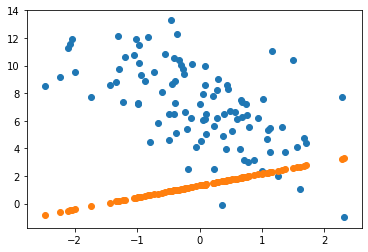

In [253]:
showYHat(yHat: tfSimpleModel(A))

In [254]:
var simpleTrainingAccuracy: [Float] = []
var simpleTrainingLoss: [Float] = []

In [255]:
for epoch in 1...50 {
    var epochLoss: Float = 0
    var epochAccuracy: Float = 0
    var batchCount: Int = 0
    
    for dataGroup in linearDataBunch.trainingDataset {
        let (loss, libraryGradients) = tfSimpleModel.valueWithGradient {
            model -> TensorFloat in
            let libPreds = model(dataGroup.features)            
            return  meanSquaredError(predicted: libPreds, expected: dataGroup.labels)
        }
        
        optimizerTF.update(&tfSimpleModel.allDifferentiableVariables, along: libraryGradients)
        
        let preds = tfSimpleModel(dataGroup.features)
        let batchAccuracy = accuracy(expected: dataGroup.labels, 
                                  actual: preds)
        let batchLoss = loss.scalarized()
        
        simpleTrainingAccuracy.append(batchAccuracy)
        simpleTrainingLoss.append(batchLoss)
    }
}

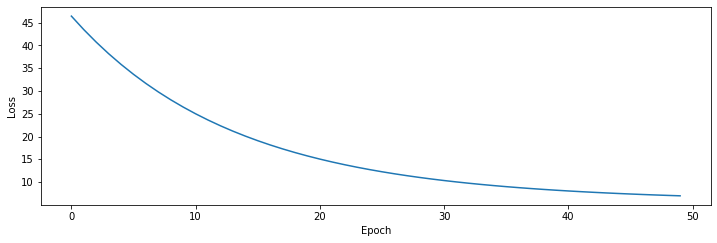

In [256]:
plotLoss(lossArray: simpleTrainingLoss)

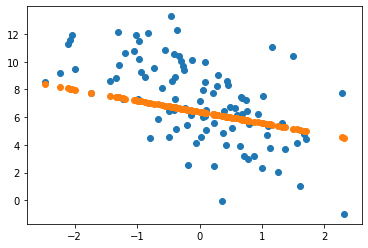

In [257]:
showYHat(yHat: tfSimpleModel(A))